# Data Exploration

This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 

In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read dataset
lending_data =pd.read_csv('loan_data.csv')
lending_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
definition = pd.read_csv('variable_explanation.csv')
definition.head(20)

,Variable,Explanation
0,credit_policy,1 if the customer meets the credit underwritin...
1,purpose,The purpose of the loan.
2,int_rate,The interest rate of the loan (more risky borr...
3,installment,The monthly installments owed by the borrower ...
4,log_annual_inc,The natural log of the self-reported annual in...
5,dti,The debt-to-income ratio of the borrower (amou...
6,fico,The FICO credit score of the borrower.
7,days_with_cr_line,The number of days the borrower has had a cred...
8,revol_bal,The borrower's revolving balance (amount unpai...
9,revol_util,The borrower's revolving line utilization rate...


[Source of dataset](https://www.kaggle.com/itssuru/loan-data).

# Summarized the lending data

1) Investigate the data structure and check whether the dataset has a missing value. 
2) Summarize the average value of the relational data columns in this dataset.

In [ ]:
# checking the data infromation
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#verify wherether the dataset has null value or not.
lending_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Analysis of lending data

1) Highest interest rates can be seen in small businesses with low-risk debt to income ratios. Credit scores are avg of 700 and above, which is a good performing loan. 


In [ ]:
#Summary of borrowing purpose by averages.
lending_data.groupby('purpose')['int.rate','log.annual.inc','dti','fico','revol.util','delinq.2yrs'].mean()

,int.rate,log.annual.inc,dti,fico,revol.util,delinq.2yrs
purpose,,,,,,
all_other,0.116771,10.845313,11.079498,715.344058,39.712321,0.179751
credit_card,0.119738,11.047230,14.099398,709.626783,53.600475,0.151347
debt_consolidation,0.126595,10.912909,14.076462,703.871367,54.125504,0.163255
educational,0.119907,10.549956,11.344927,708.282799,38.801166,0.157434
home_improvement,0.117507,11.201979,10.197504,724.806041,34.274626,0.136725
major_purchase,0.114171,10.844895,10.159886,722.503432,32.457895,0.173913
small_business,0.138087,11.146216,10.793296,719.988691,40.070436,0.155089


#  Borrower profile, credit score, debt to income ratios

1) Top 3 types of individual loans such as debt_consolidation, others, and credit card loans. 
2) Credit card and debit consolidation borrowers are more risker than others. 
3) Both borrower avg dti (debt to income ratio) is 14, and credit scores are also slightly lower than 709, 703 respectively.
4) Overall credit scoring is above 700, dti is less than 35%, and overall revolving loan utilization is 46.7%, which means this business is healthy, and there is no need to take action.


In [ ]:
print(lending_data[['purpose']].value_counts())

purpose           
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
dtype: int64


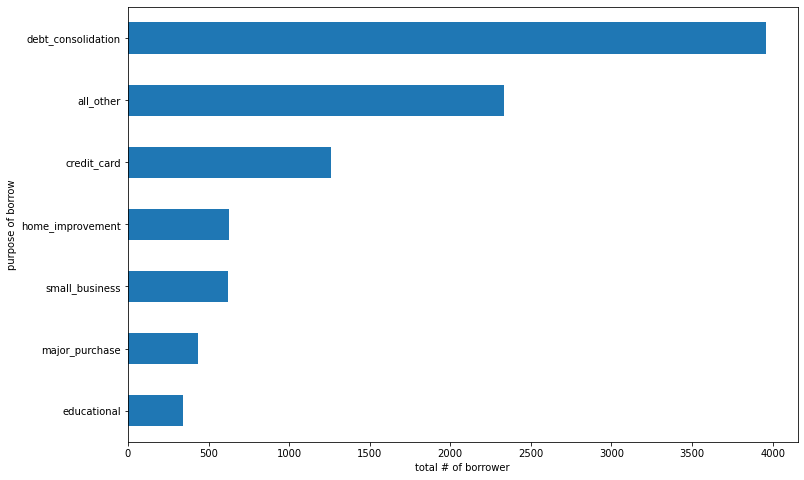

In [ ]:
#Purpose of borrow by number of borrowers

plt.figure(figsize=(12,8))
borrowers= lending_data['purpose'].value_counts()
borrowers.sort_values().plot(kind='barh')

plt.ylabel('purpose of borrow')
plt.xlabel('total # of borrower')
plt.show()

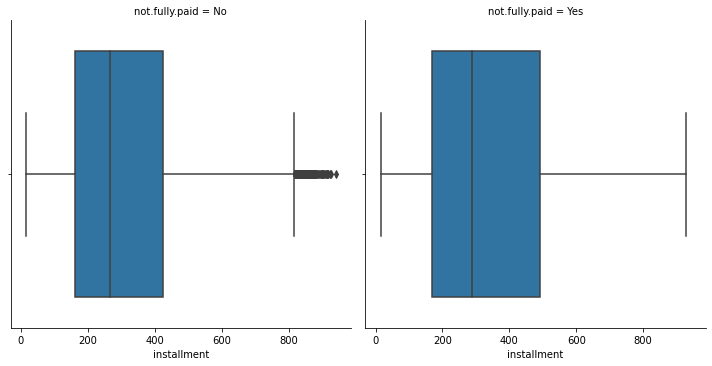

In [ ]:
# monthly installments owed by borrowers and whether they are fully paid or not.

lending_data['not.fully.paid'].replace([0], ['No'], inplace=True)
lending_data['not.fully.paid'].replace([1], ['Yes'], inplace=True)

sns.factorplot(data= lending_data, x='installment', col='not.fully.paid' ,kind='box', orient="v" )

# Show the plot
plt.show()

# Regression model to analyze interest and credit scores

1) This model identifies the relationship between interest rates and credit scoring correlation. 
2) When interest rates are higher, credit scores are lower, negative relationship between the two.
3) However, most borrowers are even repaid fully with higher interest rates, and it needs to review their credit scoring in future improvement.

<Figure size 1080x720 with 0 Axes>

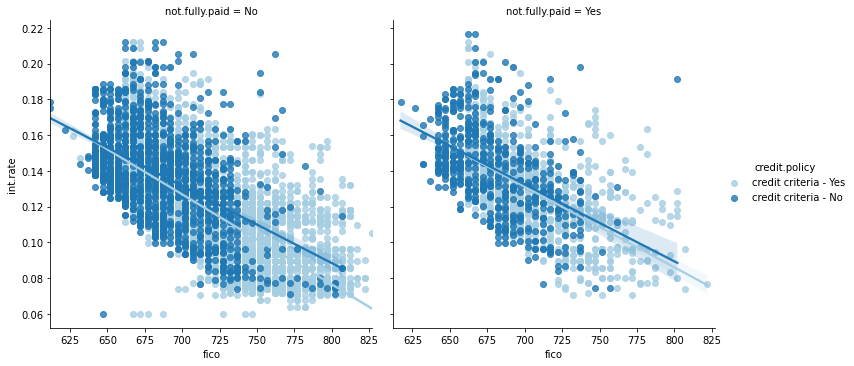

In [ ]:
plt.figure(figsize=(15,10))
lending_data['not.fully.paid'].replace([0], ['No'], inplace=True)
lending_data['not.fully.paid'].replace([1], ['Yes'], inplace=True)

lending_data['credit.policy'].replace([0], ['credit criteria - No'], inplace=True)
lending_data['credit.policy'].replace([1], ['credit criteria - Yes'], inplace=True)

sns.lmplot(y='int.rate',x='fico', data=lending_data, hue='credit.policy',col='not.fully.paid',palette='Paired')


In [ ]:
# Replacing to original data types in the dataset

lending_data['not.fully.paid'].replace(['No'], [0], inplace=True)
lending_data['not.fully.paid'].replace(['Yes'], [1], inplace=True)

lending_data['credit.policy'].replace(['credit criteria - No'], [0], inplace=True)
lending_data['credit.policy'].replace(['credit criteria - Yes'], [1], inplace=True)

# Transform dataset to an unsupervised algorithm

1) Transform lending label data to numeric values. Such as (indicator/binary type 0 or 1) and preparing for unsupervised machine learning.
2) Machine learning sklearn model to train the data into test splits.
3) Decision tree model to predict credit risk portfolio.
4) Validate with random forest model to predict credit risk portfolio.

In [ ]:
# Transform label data to numeric values. such as (indicator/binary type 0 or 1) and prepare for unsupervised machine learning

predict_lending_data = pd.get_dummies(data = lending_data, columns = ['purpose'], drop_first = True)
predict_lending_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Machine learning to train the data into test splits

from sklearn.model_selection import train_test_split

X = predict_lending_data.drop('not.fully.paid', axis = 1)
y = predict_lending_data['not.fully.paid']

# Parameters for unsupervised machine leaning dataset
# size of the training dataset - ranges from (0.1 to 1.0) 
# size of the testing dataset - default is 0.25
# random split - default default np.random
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5 ,test_size=0.3, random_state= np.random )

# Predict credit risk portfolio

1) As per classification accuracy, 25% of borrowers did not pay their loan, whereas 85% were fully paid.
3) overall portfolio of revolving loan utilization is 46.7%
2) Next step to monitor, if default risk is above 50%, businesses need immediate action.



In [ ]:
# Decision tree model to predict credit risk analysis

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.23      0.21       443

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



In [ ]:
# Random forest model to predict credit risk analysis, number of estimator as default as 100

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.47      2874
weighted avg       0.79      0.85      0.78      2874

